# OpenCV Faster R-CNN

> ## Image Object Detection

- Pretrained 모델 파일 로드 후 OpenCV 기반 Object Detection 수행

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Image File Download

- KIA.jpg 다운로드

In [2]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/image/KIA.jpg

--2023-04-17 01:48:01--  https://raw.githubusercontent.com/rusita-ai/pyData/master/image/KIA.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65805 (64K) [image/jpeg]
Saving to: ‘KIA.jpg’

KIA.jpg             100%[===================>]  64.26K  --.-KB/s    in 0.009s  

2023-04-17 01:48:01 (6.62 MB/s) - ‘KIA.jpg’ saved [65805/65805]



- KIA.jpg 확인

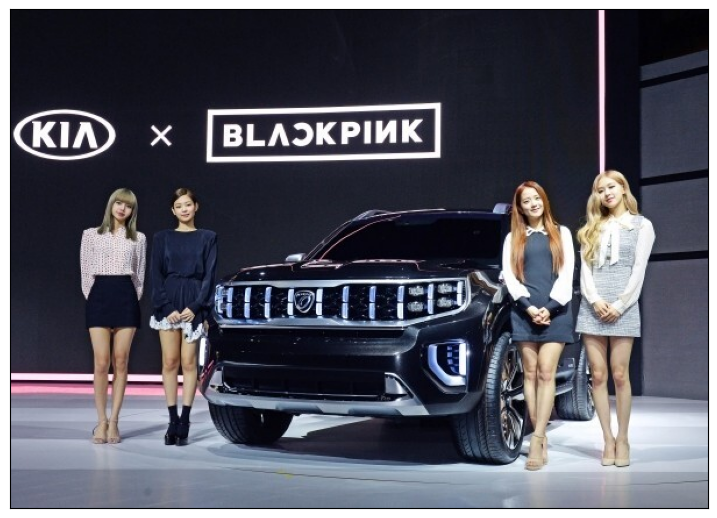

Image Shape: (429, 600, 3)


In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/KIA.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (9, 9))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

print('Image Shape:', img.shape)

# II. Object Detection API Download

> ##  1) Pretrained Model Download

- https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API
- http://download.tensorflow.org/models/object_detection/


- faster_rcnn_resnet50_coco_2018_01_28.tar.gz

In [6]:
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz

--2023-04-17 01:50:55--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.70.128, 2607:f8b0:4001:c02::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.70.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

faster_rcnn_resnet5 100%[===================>] 363.69M   222MB/s    in 1.6s    

2023-04-17 01:50:56 (222 MB/s) - ‘faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]



- faster_rcnn_resnet50_coco_2018_01_28.tar.gz 압축해제

In [7]:
!tar -xvf faster_rcnn_resnet50_coco_2018_01_28.tar.gz

faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb


- 결과 확인
  - frozen_inference_graph.pb

In [8]:
!ls -l /content/faster_rcnn_resnet50_coco_2018_01_28

total 296068
-rw-r--r-- 1 345018 5000        77 Feb  1  2018 checkpoint
-rw-r--r-- 1 345018 5000 120549957 Feb  1  2018 frozen_inference_graph.pb
-rw-r--r-- 1 345018 5000 176914228 Feb  1  2018 model.ckpt.data-00000-of-00001
-rw-r--r-- 1 345018 5000     14460 Feb  1  2018 model.ckpt.index
-rw-r--r-- 1 345018 5000   5675175 Feb  1  2018 model.ckpt.meta
-rw-r--r-- 1 345018 5000      3240 Feb  1  2018 pipeline.config
drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 saved_model


> ## 2) Model Configuration Download

- https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

In [9]:
!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

--2023-04-17 01:52:00--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90893 (89K) [text/plain]
Saving to: ‘faster_rcnn_resnet50_coco_2018_01_28.pbtxt’

faster_rcnn_resnet5 100%[===================>]  88.76K  --.-KB/s    in 0.01s   

2023-04-17 01:52:00 (5.86 MB/s) - ‘faster_rcnn_resnet50_coco_2018_01_28.pbtxt’ saved [90893/90893]



# III. Model and Configuration load

- v2.dnn.readNetFromTensorflow()

In [18]:
cv_net = cv2.dnn.readNetFromTensorflow('/content/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                        '/content/faster_rcnn_resnet50_coco_2018_01_28.pbtxt')

# IV. Class ID Setting

- #### COCO Dataset

> ## 1) YOLO

In [20]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                       11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                       21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                       31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                       41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                       51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                       61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                       71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

> ## 2) OpenCV - TensorFlow

- Faster R-CNN

In [21]:
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                     10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                     20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                     30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                     40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                     50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                     60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                     70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                     80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                     90:'hair brush'}

> ## 3) OpenCV - TensorFlow

- SSD

In [19]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                   11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                   21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                   31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                   41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                   51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                   61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                   71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                   81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                   91:'hair brush'}

# V. Inference 수행

> ## 1) Object Detection

1. 이미지 전처리
2. Model에 입력
3. Object Detection 수행
4. 결과 이미지에 시각화

person : 0.9986
person : 0.9981
person : 0.9960
car : 0.9693
person : 0.9576


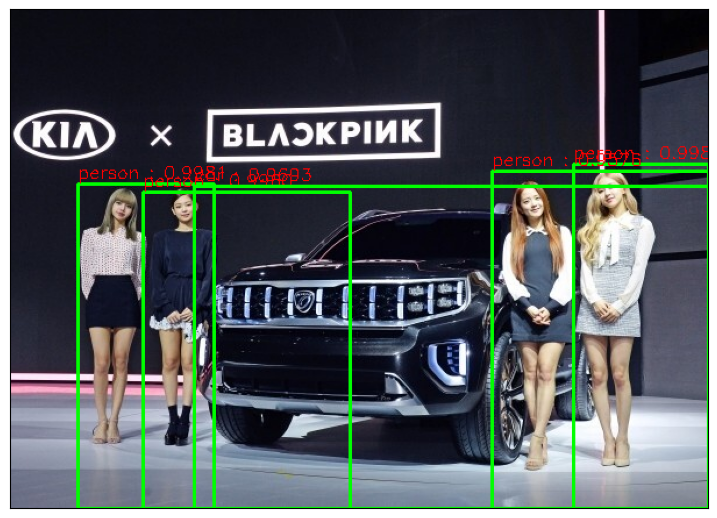

In [23]:
# 1. 이미지 전처리
### 원본 이미지가 Resizing( 0 ~ 1 : Scaling )되어 처리
### Scaling 크기로 Bounding Box 위치가 예측
### 이후 원복을 위한 원본 이미지 shape 정보 저장
rows = img.shape[0]
cols = img.shape[1]

### 결과 출력 생성용 백업 이미지
draw_img = img.copy()

# 2. Model에 전처리된 이미지 입력
### 이미지 BGR to RGB 변환
cv_net.setInput(cv2.dnn.blobFromImage(img,
                                      swapRB = True))

# 3. Object Detection 수행
### cv_out 결과 반환
cv_out = cv_net.forward()

# 4. 결과 이미지에 시각화
### Bounding Box 및 Caption 글자색
green_color = (0, 255, 0)
red_color = (0, 0, 255)

### Detected Object 정보 추출
for detection in cv_out[0, 0, :, :]:
    score = float(detection[2])
    class_id = int(detection[1])
    ### Class Score 0.5 이상만 추출
    if score > 0.5:
        ### Detection object 원본 이미지 비율로 계산
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows

        ### labels_to_names_0 Class_ID
        caption = "{} : {:.4f}".format(labels_to_names_0[class_id], score)
        print(caption)

        ### Detection object draw_img에 그리기
        cv2.rectangle(draw_img,
                      (int(left), int(top), int(right), int(bottom)),
                      color = green_color,
                      thickness = 2)
        
        cv2.putText(draw_img,
                    caption,
                    (int(left), int(top - 5)),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5,
                    color = red_color,
                    thickness = 1)
        
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (9, 9))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

> ## 2) 'cv_out' Information

- Shape

In [25]:
cv_out.shape

(1, 1, 100, 7)

- Information
  - [0]: 의미없음
  - [1]: Class ID
  - [2]: Class Score
  - [3]: x_min
  - [4]: y_min
  - [5]: x_max
  - [6]: y_max

In [26]:
cv_out

array([[[[0.00000000e+00, 0.00000000e+00, 9.98597443e-01,
          8.07034552e-01, 3.12165052e-01, 9.23360288e-01,
          9.24362659e-01],
         [0.00000000e+00, 0.00000000e+00, 9.98060763e-01,
          9.81637985e-02, 3.51075649e-01, 1.98028222e-01,
          8.73650432e-01],
         [0.00000000e+00, 0.00000000e+00, 9.95989740e-01,
          1.90570608e-01, 3.66011232e-01, 2.98628092e-01,
          8.72016907e-01],
         [0.00000000e+00, 2.00000000e+00, 9.69332576e-01,
          2.64267564e-01, 3.55557352e-01, 7.81100273e-01,
          8.71630430e-01],
         [0.00000000e+00, 0.00000000e+00, 9.57577109e-01,
          6.90088987e-01, 3.24307829e-01, 8.41504931e-01,
          9.02565956e-01],
         [0.00000000e+00, 3.00000000e+01, 3.87312174e-01,
          7.75637209e-01, 6.63498163e-01, 8.42055857e-01,
          8.31739545e-01],
         [0.00000000e+00, 2.60000000e+01, 1.10461265e-01,
          7.85410285e-01, 6.70504212e-01, 8.44500780e-01,
          8.44856262e-01],

# VI. Define Object Detection Function

> ## 1) get_detected_img( ) 정의

In [34]:
import time

def get_detected_img(cv_net, img_array, score_threshold, use_copied_array = True, is_print = True):

    rows = img_array.shape[0]
    cols = img_array.shape[1]

    draw_img = None
    if use_copied_array:
       draw_img = img_array.copy()
    else:
       draw_img = img_array

    cv_net.setInput(cv2.dnn.blobFromImage(img_array, swapRB = True))

    start = time.time()
    cv_out = cv_net.forward()

    green_color = (0, 255, 0)
    red_color = (0, 0, 255)

    for detection in cv_out[0, 0, :, :]:
        score = float(detection[2])
        class_id = int(detection[1])
        # score_threshold 이상만 추출
        if score > score_threshold:
          left = detection[3] * cols
          top = detection[4] * rows
          right = detection[5] * cols
          bottom = detection[6] * rows

          caption = "{} : {:.4f}".format(labels_to_names_0[class_id], score)
          print(caption)

          cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color = green_color, thickness = 2)
          cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color , 1)

    if is_print:
       print('Detection Time : ', round(time.time() - start, 2), '초')

    return draw_img

> ## 2) get_detected_img( ) 실행

person : 0.9986
person : 0.9981
person : 0.9960
car : 0.9693
person : 0.9576
Detection Time :  5.81 초


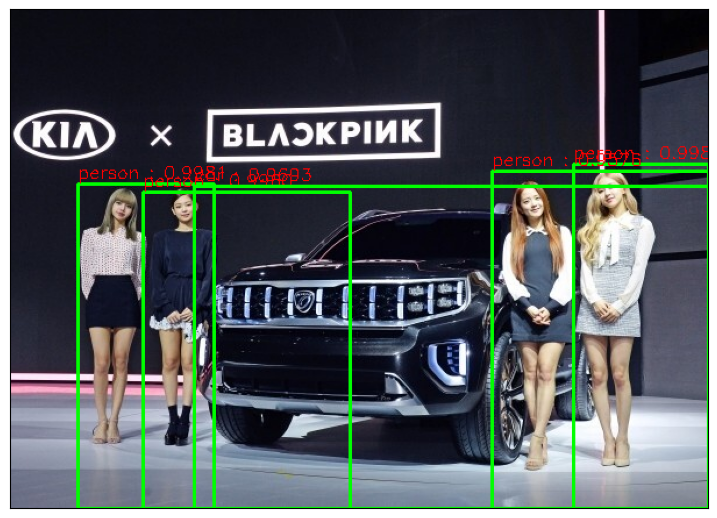

In [35]:
# Image Load
img = cv2.imread('/content/KIA.jpg')

# Model Load
cv_net = cv2.dnn.readNetFromTensorflow('/content/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                       '/content/faster_rcnn_resnet50_coco_2018_01_28.pbtxt')

# Object Detection
draw_img = get_detected_img(cv_net, img, score_threshold = 0.5, use_copied_array = True, is_print = True)

img_rbg = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (9, 9))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

# VII. 추가 Image

> ## 1) Image Load

In [36]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/image/AS.jpg

--2023-04-17 02:21:11--  https://raw.githubusercontent.com/rusita-ai/pyData/master/image/AS.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268308 (262K) [image/jpeg]
Saving to: ‘AS.jpg’

AS.jpg              100%[===================>] 262.02K  --.-KB/s    in 0.03s   

2023-04-17 02:21:12 (7.34 MB/s) - ‘AS.jpg’ saved [268308/268308]



> ## 2) Object Detection

image shape :  (800, 1200, 3)
person : 0.9975
car : 0.9912
person : 0.9899
person : 0.9863
person : 0.9830
person : 0.9822
person : 0.9781
car : 0.9632
person : 0.9515
car : 0.9465
car : 0.9195
car : 0.9176
person : 0.9121
person : 0.9013
person : 0.8994
person : 0.8956
person : 0.8932
car : 0.8895
person : 0.8888
person : 0.8886
person : 0.8846
person : 0.8748
car : 0.8624
car : 0.8318
person : 0.8150
car : 0.7576
person : 0.7456
person : 0.7313
person : 0.7280
person : 0.7016
person : 0.6989
person : 0.6929
person : 0.6815
person : 0.6408
person : 0.6285
car : 0.5635
person : 0.5241
person : 0.5193
Detection Time :  7.85 초


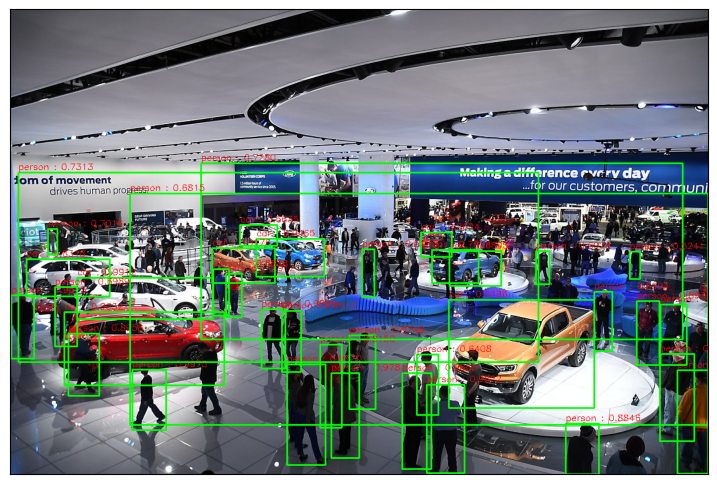

In [38]:
# Image Load

img = cv2.imread('/content/AS.jpg')
print('image shape : ',img.shape)

# Model Load
cv_net = cv2.dnn.readNetFromTensorflow('/content/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                       '/content/faster_rcnn_resnet50_coco_2018_01_28.pbtxt')

# Object Detection

draw_img = get_detected_img(cv_net, img, score_threshold = 0.5, use_copied_array =True, is_print = True)

img_rgb = cv2.cvtColor(draw_img,  cv2.COLOR_BGR2RGB)

plt.figure(figsize = (9, 9))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()